In [153]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

base_dir = os.path.join(os.getcwd(), "dane")  
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [154]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(32, 32),
    batch_size=32
)


Found 16746 files belonging to 92 classes.


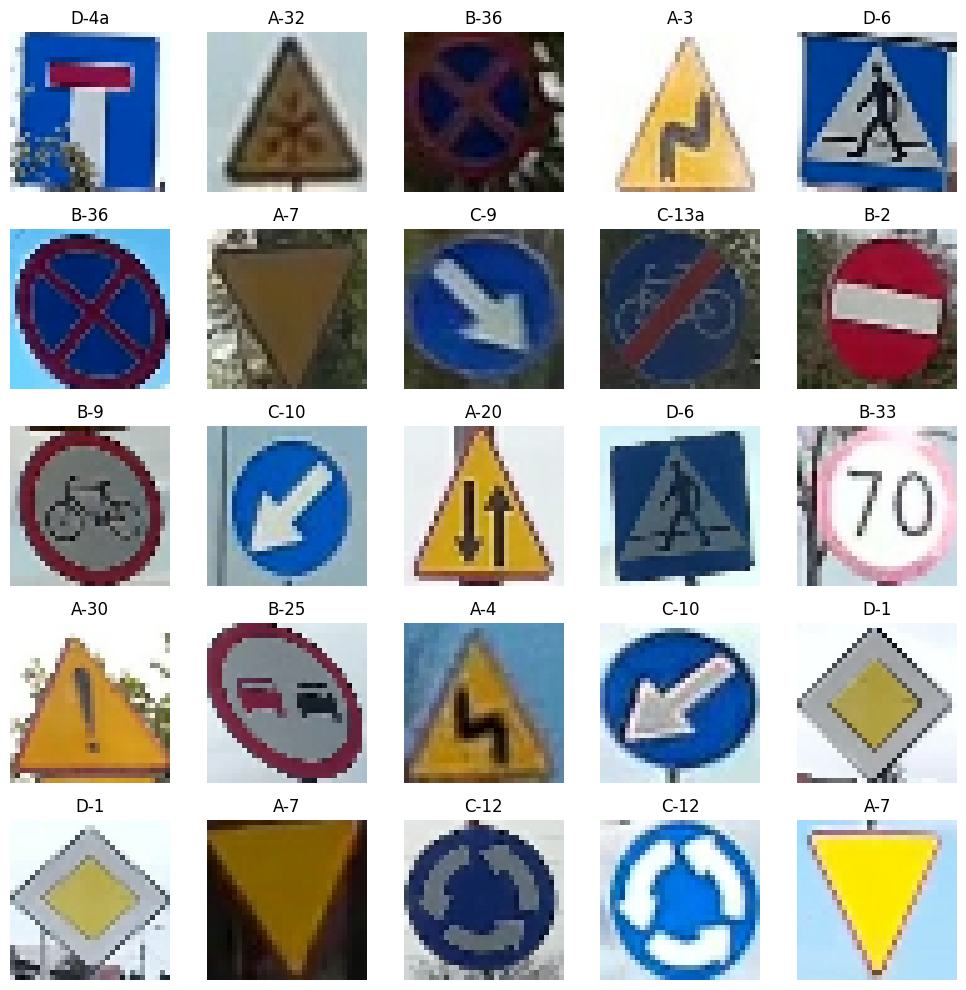

In [155]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): 
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(train_ds.class_names[labels[i]])   
        plt.axis("off")
plt.tight_layout()
plt.show()

In [156]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(32, 32),
    batch_size=32
)

Found 4298 files belonging to 92 classes.


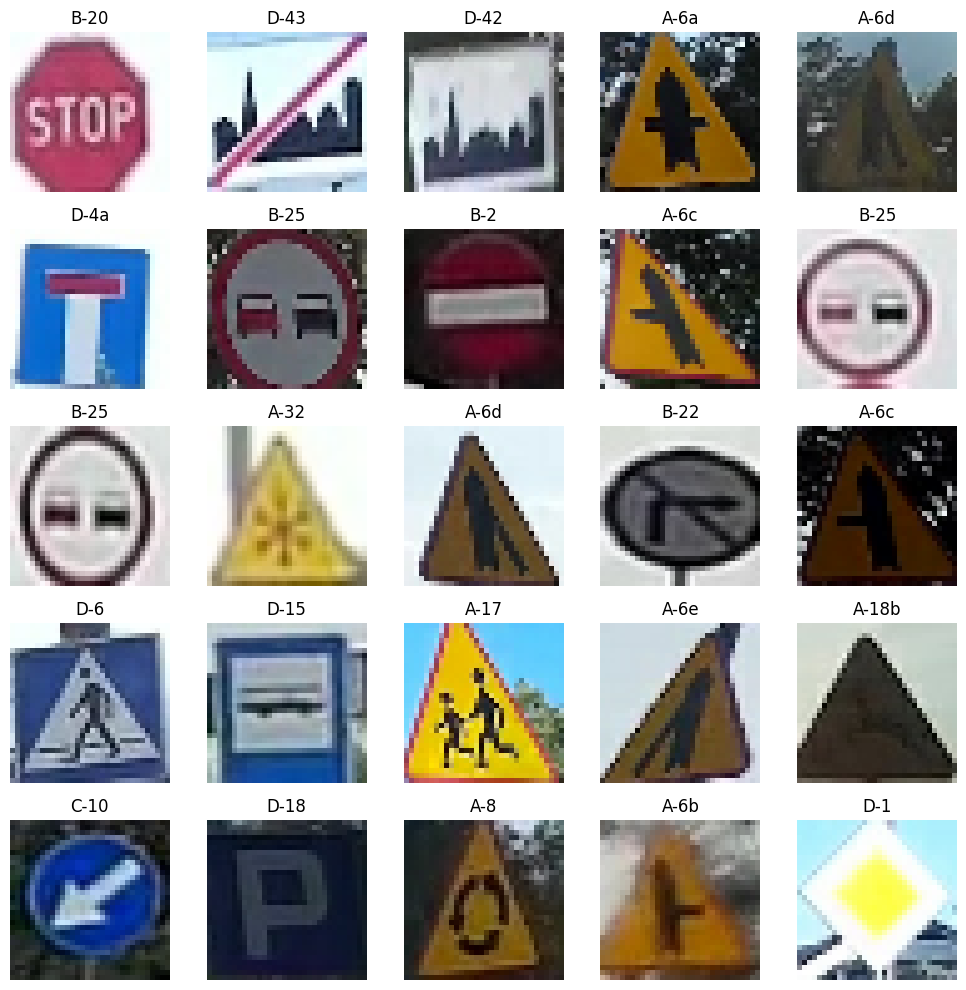

In [157]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1): 
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(test_ds.class_names[labels[i]])    
        plt.axis("off")
plt.tight_layout()
plt.show()

In [158]:

klasy_opis = {
    "A-1": "Niebezpieczny zakrƒôt w prawo",
    "A-2": "Niebezpieczny zakrƒôt w lewo",
    "A-3": "Dwa niebezpieczne zakrƒôty ‚Äì pierwszy w prawo",
    "A-4": "Dwa niebezpieczne zakrƒôty ‚Äì pierwszy w lewo",
    "A-6a": "Skrzy≈ºowanie z drogƒÖ podporzƒÖdkowanƒÖ z obydwustron",
    "A-6b": "Skrzy≈ºowanie z drogƒÖ podporzƒÖdkowanƒÖ z prawej",
    "A-6c": "Skrzy≈ºowanie z drogƒÖ podporzƒÖdkowanƒÖ po obu stronach",
    "A-6d": "Wlot drogi jednokierunkowej z prawej",
    "A-6e": "Wlot drogi jednokierunkowej z lewej",
    "A-7": "UstƒÖp pierwsze≈Ñstwa",
    "A-8": "Skrzy≈ºowanie o ruchu okrƒô≈ºnym",
    "A-11": "Pr√≥g zwalniajƒÖcy",
    "A-11a": "Strefa ruchu powolnego",
    "A-12a": "Zwƒô≈ºenie jezdni ‚Äì obustronne",
    "A-14": "Roboty na drodze",
    "A-15": "≈öliska jezdnia",
    "A-16": "Przej≈õcie dla pieszych",
    "A-17": "Uwaga przechodzacy ludzie",
    "A-18b": "Zwierzƒôta dzikie",
    "A-20": "Odcinek jezdni o ruchu dwukierunkowym",
    "A-21": "Tramwaj",
    "A-23": "Rowerzy≈õci",
    "A-24": "Roboty drogowe",
    "A-29": "Uwaga ≈õwiat≈Ça",
    "A-30": "Niebezpiece≈Ñstwo",
    "A-32": "Zamieƒá ≈õnie≈ºna",
    "B-1": "Zakaz ruchu w obu kierunkach",
    "B-2": "Zakaz wjazdu",
    "B-5": "Zakaz wjazdu samochod√≥w ciƒô≈ºarowych",
    "B-6-B-8-B-9": "Zakaz wjazdu ciƒÖgnik√≥w i motocykli",
    "B-8": "Zakaz wjazdu w√≥zk√≥w rowerowych",
    "B-9": "Zakaz wjazdu motorower√≥w",
    "B-18": "Zakaz wjazdu pojazd√≥w o nacisku osi wiƒôkszym ni≈º podany",
    "B-20": "STOP",
    "B-21": "Zakaz skrƒôtu w lewo",
    "B-22": "Zakaz skrƒôtu w prawo",
    "B-25": "Zakaz wyprzedzania",
    "B-26": "Zakaz wyprzedzania przez samochody ciƒô≈ºarowe",
    "B-27": "Koniec zakazu wyprzedzania",
    "B-33": "Ograniczenie prƒôdko≈õci",
    "B-34": "Koniec ograniczenia prƒôdko≈õci",
    "B-36": "Zakaz zatrzymywania siƒô",
    "B-41": "Zakaz ruchu pieszych",
    "B-42": "Koniec zakaz√≥w",
    "B-43": "Strefa ograniczonej prƒôdko≈õci",
    "B-44": "Koniec strefy ograniczonej prƒôdko≈õci",
    "C-2": "Nakaz jazdy w prawo",
    "C-4": "Nakaz jazdy w lewo",
    "C-5": "Nakaz jazdy prosto",
    "C-6": "Nakaz jazdy prosto lub w prawo",
    "C-7": "Nakaz jazdy prosto lub w lewo",
    "C-9": "Nakaz jazdy z prawej strony przeszkody",
    "C-10": "Nakaz jazdy z lewej strony przeszkody",
    "C-12": "Ruch okrƒô≈ºny",
    "C-13": "Droga dla rower√≥w",
    "C-13a": "Koniec drogi dla rower√≥w",
    "C-13a-C-16a": "Koniec drogi dla rower√≥w i pieszych (rozdzielonej)",
    "C-13-C-16": "Droga dla pieszych i rower√≥w (wsp√≥lna)",
    "C-16": "Droga dla pieszych",
    "D-1": "Droga z pierwsze≈Ñstwem",
    "D-2": "Koniec drogi z pierwsze≈Ñstwem",
    "D-3": "Droga jednokierunkowa",
    "D-4a": "Droga bez przejazdu",
    "D-4b": "Droga bez przejazdu z lewej",
    "D-6": "Przej≈õcie dla pieszych",
    "D-6b": "Przejazd dla rowerzyst√≥w",
    "D-7": "Droga ekspresowa",
    "D-8": "Droga krajowa",
    "D-9": "Droga wojew√≥dzka",
    "D-14": "PoczƒÖtek pasa ruchu",
    "D-15": "Przystanek autobusowy",
    "D-18": "Parking",
    "D-18b": "Parking zadaszony",
    "D-21": "Stacja paliw",
    "D-23": "Stacja paliw",
    "D-23a": "Miejsce obs≈Çugi podr√≥≈ºnych",
    "D-24": "Informacja drogowa",
    "D-26": "Informacja turystyczna",
    "D-26b": "Pomoc drogowa",
    "D-26c": "Toalety",
    "D-27": "Telefon",
    "D-28": "Jedzienie",
    "D-29": "Stra≈º Po≈ºarna",
    "D-40": "Strefa zamieszkania",
    "D-41": "Koniec strefy zamieszkania",
    "D-42": "Obszar zabudowany",
    "D-43": "Koniec obszaru zabudowanego",
    "D-51": "Kontrola graniczna",
    "D-52": "Punkt poboru op≈Çat",
    "D-53": "Granica pa≈Ñstwa",
    "D-tablica": "Tablica informacyjna",
    "G-1a": "Granica pa≈Ñstwa",
    "G-3": "Miejsce obs≈Çugi podr√≥≈ºnych"
}



In [159]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [160]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [161]:


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes)
])


model.summary()


Model: "sequential_11"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_44 (Conv2D)              ‚îÇ (None, 30, 30, 64)     ‚îÇ         1,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_45 (Conv2D)              ‚îÇ (None, 28, 28, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_22 (MaxPooling2D) ‚îÇ (None, 14, 14, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 14, 14, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_46 (Conv2D)              ‚îÇ (None, 12, 12, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_47 (Conv2D)              ‚îÇ (None, 10, 10, 128)    ‚îÇ       147,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_23 (MaxPooling2D) ‚îÇ (None, 5, 5, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 5, 5, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_11 (Flatten)            ‚îÇ (None, 3200)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_22 (Dense)                ‚îÇ (None, 128)            ‚îÇ       409,728 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ

 Total params: 681,756 (2.60 MB)

 Trainable params: 681,756 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [163]:
history = model.fit(train_ds, validation_data=test_ds, epochs=20)


Epoch 1/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 40ms/step - accuracy: 0.3891 - loss: 2.7278 - val_accuracy: 0.8702 - val_loss: 0.5338
Epoch 2/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 40ms/step - accuracy: 0.8554 - loss: 0.5823 - val_accuracy: 0.9356 - val_loss: 0.2554
Epoch 3/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 39ms/step - accuracy: 0.9195 - loss: 0.3150 - val_accuracy: 0.9525 - val_loss: 0.2095
Epoch 4/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 39ms/step - accuracy: 0.9436 - loss: 0.2106 - val_accuracy: 0.9604 - val_loss: 0.1688
Epoch 5/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 40ms/step - accuracy: 0.9503 - loss: 0.1851 - val_accuracy: 0.9649 - val_loss: 0.1469
Epoch 6/20
524/524 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 40ms/step - accuracy: 0.9623 - loss: 0.1433 - val_accuracy: 0.9630

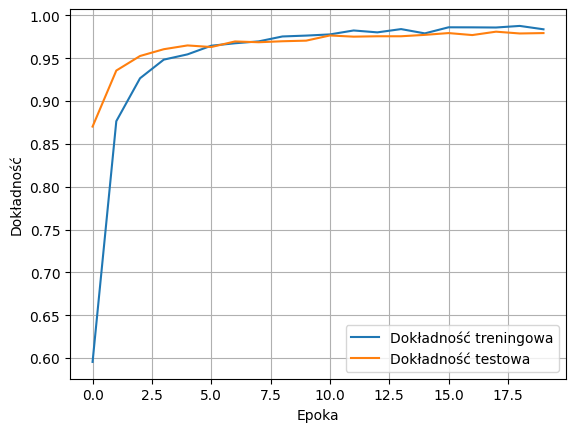

In [164]:

plt.plot(history.history['accuracy'], label='Dok≈Çadno≈õƒá treningowa')
plt.plot(history.history['val_accuracy'], label='Dok≈Çadno≈õƒá testowa')
plt.xlabel('Epoka')
plt.ylabel('Dok≈Çadno≈õƒá')
plt.legend()
plt.grid(True)
plt.show()


In [165]:
model.save('CNNZnakiDrogowe.h5')


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 82ms/step


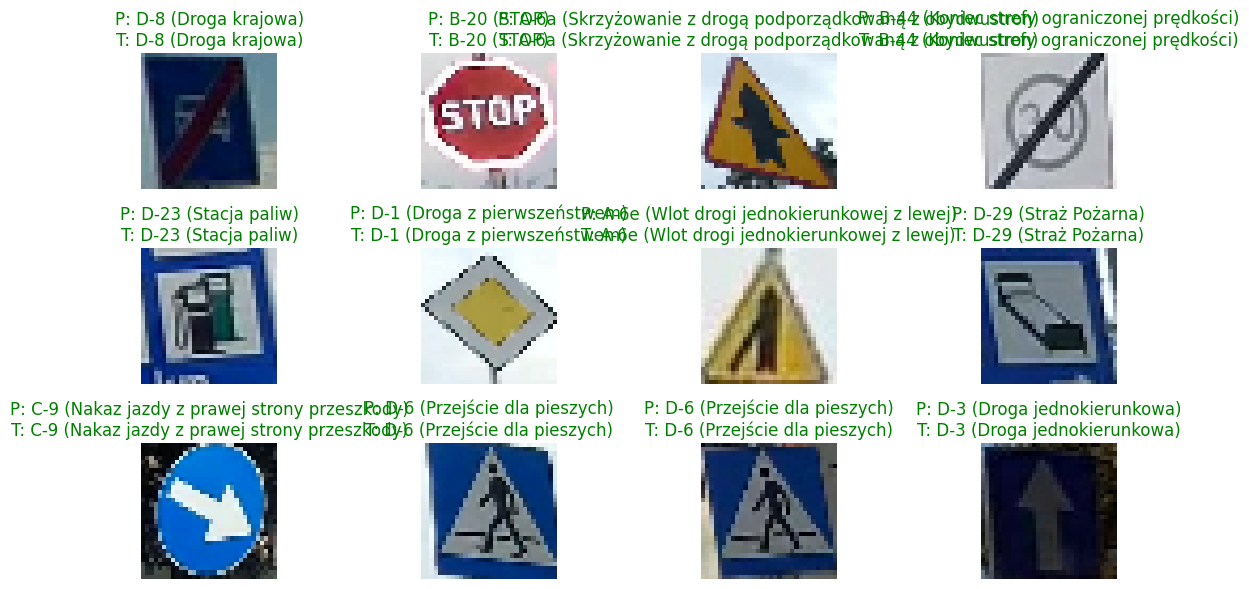

In [ ]:
for images, labels in test_ds.take(1):  
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow((images[i].numpy() * 255).astype("uint8"))

        true_label = class_names[labels[i]]
        predicted_label = class_names[predicted_labels[i]]

       
        pred_text = f"{predicted_label} ({klasy_opis.get(predicted_label, 'Brak opisu')})"
        true_text = f"{true_label} ({klasy_opis.get(true_label, 'Brak opisu')})"

        color = "green" if predicted_label == true_label else "red"
        plt.title(f"P: {pred_text}\nT: {true_text}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step
üõë Model przewiduje: B-20 (STOP) z pewno≈õciƒÖ 100.00%


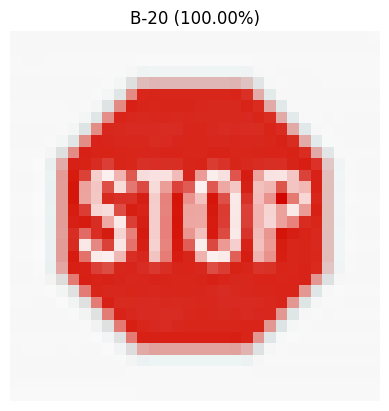

In [167]:
image_path = "dosprawdzenia/stop.png"  


img = Image.open(image_path).resize((32, 32))
img_array = np.array(img) / 255.0 


img_array = np.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]
confidence = tf.nn.softmax(predictions[0])[predicted_index].numpy() * 100


print(f"üõë Model przewiduje: {predicted_class} ({klasy_opis.get(predicted_class, 'Brak opisu')}) z pewno≈õciƒÖ {confidence:.2f}%")

plt.imshow((np.squeeze(img_array) * 255).astype("uint8"))

plt.title(f"{predicted_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()